In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
a = pd.read_csv("../marked.csv")
b = pd.read_csv("../node_mutex.csv")

In [216]:
data = pd.concat([a, b], ignore_index=True)
data["list type"] = data["name"].str.split("_").str[:-1].str.join("_")
data["# threads"] = data["num_threads"]
data["time_per_elements"] = data["time"] / data["num_elements"]
data["time_per_query"] = data["time"] / data["num_queries"]
data["time_per_query_and_elements"] = data["time"] / data["num_queries"] / data["num_elements"]
data["log_time_per_query_and_elements"] = np.log2(data["time_per_query_and_elements"])
data["log_num_elements"] = np.log2(data["num_elements"])

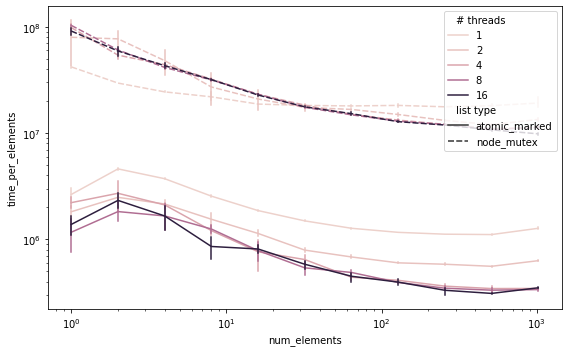

In [217]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data[data["num_threads"].isin((1,2,4,8,16))], x="num_elements", y="time_per_elements", hue="# threads", style="list type", err_style="bars", legend="full")
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout()

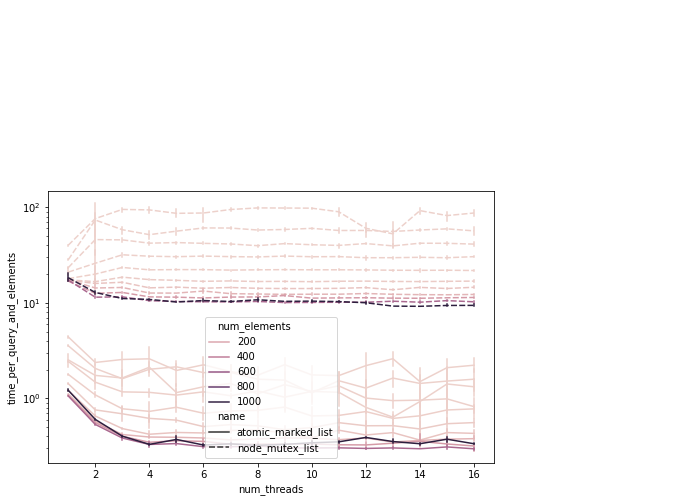

In [205]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=data, x="num_threads", y="time_per_query_and_elements", hue="num_elements", style="name", err_style="bars")
ax.set_yscale("log")